### 0. Understand the business requirements

Before you can start with your data, there are couple steps you have to take.

* Understand the business and their needs
* Gather required information
* Clarify the scope
    * Define the business objectives
    * Preliminary queastions you want to answer
    
 Data analysis rarely happens just because someone wants know womething about the data. In most companies, day-to-day decision-making relies on the output of the data analysis. Most decision makers, therefore, have a set of things they want an aswer to. It is your job to answer these question in a meaningful matter. 

### 1. Import Libraries

TEXT

In [1]:
import pandas as pd
import numpy as np

### 2. Loading the Data

Every data analysis starts with loading the data. Always name your dataset something that you will remember, easy to write, and other can easily understand. In this example, we name the dataset df_raw to show that this is the original dataset and nothing has been done to it. After loading the data, it is important to check if the loading was successful and the columns are correctly displayed.

When you load from different files, there can be issues with loading it into a pandas dataframe. In case the separation character is different, that has to be defined in the read function. You might encounter one column containing various elements from other columns. Seeing how the data was loaded with, for example, head() you can identify these before going more in-depth.

In [2]:
df_raw = pd.read_csv("netflix_titles.csv")
df_raw.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


### 3. Analysing the Data

After we are satisfied that the data was loaded correctly, we always want to start with getting to know the dataset. Without knowing what is in our dataset, we don't know what it that we are working with. This step sets up the possibilty for you to identify missing or incorrect data. It is an important pre-requisite for data cleaning!

You can see that we still call our dataset df_raw. That is because we have not modified anything in the dataset yet. We are just exploring.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
def isNull(x):
       return x.isna().sum()
        
def show_details(dataframe):
    return dataframe.agg(['dtype', 'count', 'nunique', isNull])
    
show_details(df_raw)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
dtype,object,object,object,object,object,object,object,int64,object,object,object,object
count,8807,8807,8807,6173,7982,7976,8797,8807,8803,8804,8807,8807
nunique,8807,2,8807,4528,7692,748,1767,74,17,220,514,8775
isNull,0,0,0,2634,825,831,10,0,4,3,0,0


### 4. Cleaning the Data

After identfying the general charactersitics of our dataset, we can clean it up. Below, you can see a couple queries that you can perform to make your data cleaner. Clean data is the fundation of a good data analysis!

Cleaning of the dataset can include and is not limited to:
* dealing with missing values
* formating date columns
* adding/removing unnceseary columns
* changing datatypes

After we are satisfied with the clenliness of our dataset, we should always save it with a new name. This allows you to look back at the original dataset easily and have a clear separation between the cleaned and raw dataset.

In [5]:
# Remove rows that have null values in one of the defined columns
df = df_raw.dropna(subset=['date_added', 'rating', 'duration', 'country'])
# Remove the defined columns
df = df.drop(['director', 'cast', 'description'], axis=1)

In [6]:
# Parse date_added to datetimes
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

In [7]:
# Cast durations to int
isMovie = df['type'] == 'Movie'
df.loc[isMovie, 'duration'] = df.loc[isMovie, 'duration'].str.split(' ').str[0]
df.loc[~isMovie, 'duration'] = df.loc[~isMovie, 'duration'].str.split(' ').str[0]
df.duration = df.duration.astype(int)

In [8]:
# Create new column with number of countries
df['no_countries'] = df['country'].str.split(',').str.len()

In [9]:
df['main_country'] = df['country'].str.split(',').str[0]

In [10]:
df.agg(['dtype', 'count', 'nunique', isNull])

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,no_countries,main_country
dtype,object,object,object,object,datetime64[ns],int64,object,int32,object,int64,object
count,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961
nunique,7961,2,7961,748,1683,73,14,203,497,10,86
isNull,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.to_csv('netflix_titles_cleaned.csv', index=False)

### 5. Exploratory Data Analysis (EDA)

After your dataset has been cleaned, it is a great idea to get to know your datset in more depth. This step is also referred to as exploratory data analysis (EDA). This is your chance to understand the data better and prepare it for visualization. In many cases the queries you run in this step will be the base of your visualization, as they are the programatic way of answering the preliminary questions you (or the stakeholders) defined.

In [12]:
df = pd.read_csv('netflix_titles_cleaned.csv')

In [13]:
df.head(4)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,no_countries,main_country
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,1,United States
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",1,South Africa
2,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",1,India
3,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",6,United States


In [14]:
# Number of movies vs. TV Show entries
df['type'].value_counts()

Movie      5687
TV Show    2274
Name: type, dtype: int64

In [15]:
# Count movies per year
isMovie = df['type'] == 'Movie'
df[isMovie]['release_year'].value_counts()

2017    729
2018    713
2016    638
2019    565
2020    461
       ... 
1959      1
1946      1
1963      1
1961      1
1966      1
Name: release_year, Length: 73, dtype: int64

### 6. Visualisation

The visualization part of data analysis is arguable one of the most important. This is what managers, CEOs and stakeholders use to make decisions. You should always structure your visuals so that they are clearly understandable. Preferable have a title and the colors are meaningful and consistent. We have given you multiple links to websites that can help you figure out what kind of visuals you need to use for different analysis, please use these.

Below you see a couple of very basic visuals that one can do. Be creative!

<AxesSubplot:>

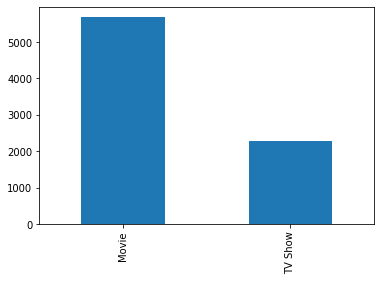

In [17]:
# plotting the distribution of movies and TV shows
df['type'].value_counts().plot.bar()

<AxesSubplot:xlabel='type'>

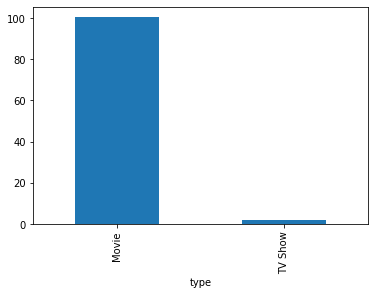

In [18]:
# plotting the average duration of movies and TV shows
df.groupby('type')['duration'] \
    .mean(numeric_only=True) \
    .plot.bar()

<AxesSubplot:ylabel='main_country'>

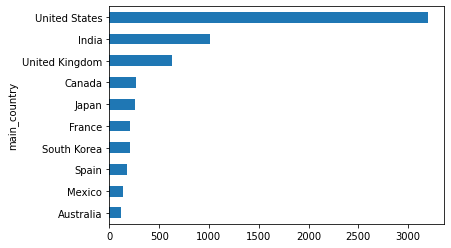

In [19]:
# plotting the distribution of titles by country of release
df.groupby('main_country')['title'] \
    .size() \
    .nlargest(10) \
    .sort_values(ascending=True) \
    .plot.barh()

<AxesSubplot:xlabel='release_year'>

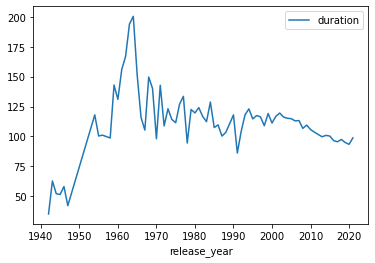

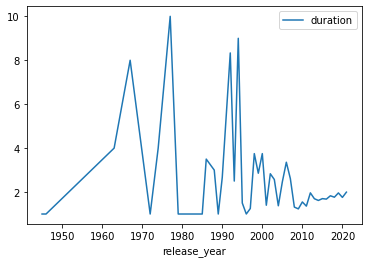

In [20]:
# plotting the change in duration over the years for movies and TV shows
isMovie = df['type'] == 'Movie'
df[isMovie].groupby('release_year')['duration'].mean().reset_index().sort_values('release_year').plot(x='release_year', y='duration')
df[~isMovie].groupby('release_year')['duration'].mean().reset_index().sort_values('release_year').plot(x='release_year', y='duration')

Text(0, 0.5, 'mean title length')

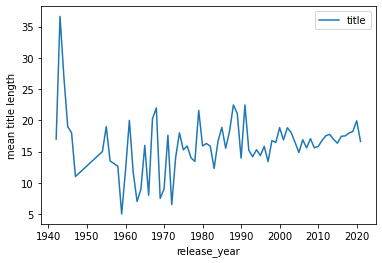

In [22]:
# plotting the change in the length of the titles over time
def meanLength(x):
    return x.str.len().mean()

ax = df[isMovie].groupby('release_year')[['title']] \
    .agg(meanLength) \
    .reset_index() \
    .plot(x='release_year', y='title')

ax.set_ylabel('mean title length')

### 7. Interpretation

After you have generated the visuals, it is important that you also interpret them with words. There could be a case that the person looking at your plot will not know what the different values stand for or doesn't quite know what the distribution means for them in their decision-making. Describe the plots always with a clear language, and try to avoide many technical words.

Also, when showing your findings, do not include your code (or other ways of getting the visual). Most decision-makers do not code and will not understand what happened. For thet it matter how the visual look and what does it mean for the business.

##### Plot 1
In this visual we can see that there are significantly more movies on Netflix than TV Shows, as the as the value associated with Movies is almost two and a half times larger than the value of TV Shows.

##### Plot 2

Plot 2 depeicts the top 10 countries by released titles. We can see that the USA is on the top of this list with over three times more released titles as the second on the list, India. The last on the list is Australia with about 100 titles.
One explanation for this distribution could be that the first two countries both have their famous production motion picture industries that have the resources to release titles more efficiently, also making them become the main countryon the production of these titles. 

##### Plot 3

This visual shows the average runtime of movies between the 1940s and 2020s. We can observe a clear increase in runtime until the 1960s, after which there is a shar decrease. Between 2000 and 2020 we can observe that the runtime has been more static between 100 and 125 minutes.

##### Plot 4

This visuals shows the average seasons of TV Shows between the 1940s and 2020s. Here we can also observe great decreases and increases until the 2010s. The season count is between 1 and 10 while after the 2010s we can see series having seasons between 1 and 3.

##### Plot 5

In Plot 5, we can see the change in the length of the titles between the 1940s and 2020s. In general, we can say that titles became shorter.